# TensorFlow Regression Example

**Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Create the data**

In [2]:
# 1 Million Points
x_data = np.linspace(0.0,10.0,1000000)

In [3]:
noise = np.random.randn(len(x_data))  # Here we add some noise value to our data

In [4]:
# y = mx + b + noise_levels
# Here m = 0.5 (slope)
b = 5
y_true =  (0.5 * x_data ) + 5 + noise

In [5]:
my_data = pd.concat([pd.DataFrame(data=x_data,columns=['X Data']),pd.DataFrame(data=y_true,columns=['Y'])],axis=1)
# Here  we  just create 2 data frames from x_data and y_true and concat them to create our final data frame

In [6]:
my_data.head()

,X Data,Y
0,0.00000,6.662598
1,0.00001,5.266274
2,0.00002,4.510164
3,0.00003,2.414765
4,0.00004,5.093582


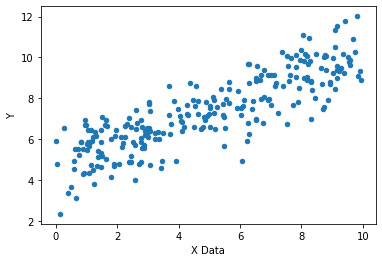

In [7]:
# We simply can't visualize 1M data points using matplotlib so we  just take a sample(250 points) from it.
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

# TensorFlow
## Batch Size

We will take the data in batches (1,000,000 points is a lot to pass in at once)

In [8]:
import tensorflow as tf

In [10]:
# Random 10 points to grab
batch_size = 10

**Variables for our parameters**

In [12]:
m = tf.Variable(0.5)  # slope 
b = tf.Variable(1.0)  # intercept

**Placeholders to feed the data into model**

In [13]:
x_ph = tf.placeholder(tf.float32,[batch_size])  # here our shape of data will be (10,)
y_ph = tf.placeholder(tf.float32,[batch_size])

**Graph**

In [15]:
y_model = m*x_ph + b  # y = mx + b 

**Loss Function to calculate loss**

In [21]:
''' here we substract our predicted value from true value and
them squre them and take the mean.'''
error = tf.reduce_sum(tf.square(y_ph-y_model))  

**Optimizer to update our  paremeters**

In [22]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

**Initialize global Variables**

In [23]:
init = tf.global_variables_initializer()

### Run our Session

In [27]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000  # number of training iteration
    
    for i in range(batches): # iterate over batches
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)  # It will grab 10 values at a time from our 1M data points 
        # Then lets assign the batch_data(10 points) into our placeholders
        feed = {x_ph:x_data[rand_ind],y_ph:y_true[rand_ind]}
        # Run the optimizer and feed the data by running the session
        sess.run(train,feed_dict=feed)
        
    model_m,model_b = sess.run([m,b])  # Grab the slope and intercept

In [28]:
model_m

0.52385646

In [29]:
model_b

4.91374

### Results

In [30]:
y_hat = x_data * model_m + model_b  # y = mx + b

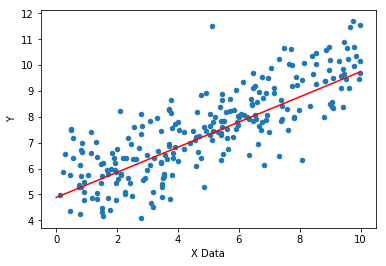

In [20]:
# plot the graph
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

## Lets do the same things by using Tensorflow estimator API



In [32]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]
# Creating a feture column which is a special estimated data type.

In [33]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)
# Creating estimator model

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp0wjllkln', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fbf431db710>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Train Test Split

We haven't actually performed a train test split yet! So let's do that on our data now and perform a more realistic version of a Regression Task

In [34]:
from sklearn.model_selection import train_test_split

In [49]:
# Train test split our data
x_train, x_test, y_train, y_test = train_test_split(x_data,y_true,test_size=0.3, random_state = 101)

In [51]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(700000,)
(700000,)
(300000,)
(300000,)


### Set up Estimator Inputs

In [52]:
# Here we are using numpy_input_fn
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=None,shuffle=True)

In [53]:
# then our train input function we don't need shuffle here because we don't want random values.
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000,shuffle=False)

In [55]:
# Test input fun
test_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_test},y_test,batch_size=4,num_epochs=1000,shuffle=False)

### Train the Estimator

In [57]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp0wjllkln/model.ckpt-1000
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1000 into /tmp/tmp0wjllkln/model.ckpt.
INFO:tensorflow:loss = 1.542746, step = 1001
INFO:tensorflow:global_step/sec: 316.278
INFO:tensorflow:loss = 6.5026956, step = 1101 (0.326 sec)
INFO:tensorflow:global_step/sec: 312.585
INFO:tensorflow:loss = 17.416943, step = 1201 (0.324 sec)
INFO:tensorflow:global_step/sec: 410.731
INFO:tensorflow:loss = 1.7123597, step = 1301 (0.234 sec)
INFO:tensorflow:global_step/sec: 316.205
INFO:tensorflow:loss = 5.579769, step = 1401 (0.319 sec)
INFO:tensorflow:global_step/sec: 289.113
INFO:tensorflow:loss = 2.402137, step = 1501 (0.343 sec)
IN

### Evaluation

In [58]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)  # Evaluate over training examples

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-09-09T08:20:43Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp0wjllkln/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-09-09-08:20:45
INFO:tensorflow:Saving dict for global step 2000: average_loss = 1.0260475, global_step = 2000, label/mean = 7.5124054, loss = 4.10419, prediction/mean = 7.5287147
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 200

In [59]:
eval_metrics = estimator.evaluate(input_fn=test_input_func,steps=1000)  # Evaluate over test data

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-09-09T08:20:45Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp0wjllkln/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-09-09-08:20:47
INFO:tensorflow:Saving dict for global step 2000: average_loss = 1.0155139, global_step = 2000, label/mean = 7.4945827, loss = 4.0620556, prediction/mean = 7.4934
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000

In [60]:
print("train metrics: {}".format(train_metrics))
print("eval metrics: {}".format(eval_metrics))

train metrics: {'average_loss': 1.0260475, 'label/mean': 7.5124054, 'loss': 4.10419, 'prediction/mean': 7.5287147, 'global_step': 2000}
eval metrics: {'average_loss': 1.0155139, 'label/mean': 7.4945827, 'loss': 4.0620556, 'prediction/mean': 7.4934, 'global_step': 2000}


### Predictions

In [61]:
# prediction input fun. Return a generator obj
pred_input_fn = tf.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)},shuffle=False)

In [63]:
# converting it into a dictionary fromat to evaluate the generator object pred_input_fn 
temp = list(estimator.predict(input_fn=pred_input_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp0wjllkln/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [69]:
# Then we have to iterate over this dict obj temp
predictions = []# np.array([])
for x in temp:
    predictions.append(x['predictions'])
    # here we just apprnd one value at a time to our prediction list

In [67]:
predictions

[array([4.8079824], dtype=float32),
 array([5.4089937], dtype=float32),
 array([6.0100045], dtype=float32),
 array([6.6110153], dtype=float32),
 array([7.2120266], dtype=float32),
 array([7.813037], dtype=float32),
 array([8.414048], dtype=float32),
 array([9.015059], dtype=float32),
 array([9.616071], dtype=float32),
 array([10.217081], dtype=float32)]

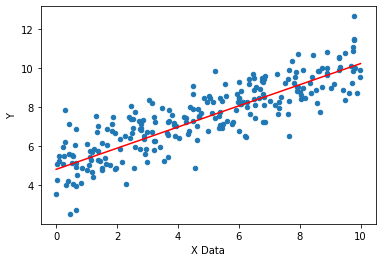

In [68]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(np.linspace(0,10,10),predictions,'r')

# Great Job!